In [23]:
from basic_data_reshape import *
from dpca_calculation import dpca_fit
import pickle
import plots
import importlib
import state_space
importlib.reload(state_space)
from state_space import loo_transform, classify_trials
import numpy as np
import matplotlib.pyplot as plt


In [2]:
host = 'china' #'aarhus'

if host == 'aarhus':
    wdir = '/projects/MINDLAB2020_MEG-AuditoryPatternRecognition/'
    mf_dir = wdir + 'scratch/maxfiltered_data/tsss_st16_corr96/'
    ica_dir = wdir + 'scratch/working_memory/ICA/'
    log_dir = wdir + 'misc/working_memory_logs/'
    fig_dir = wdir + 'scratch/working_memory/dPCA/figures/'
    
elif host == 'china':
    wdir = '/Users/xiangxingyu/Downloads/毕业设计/UCB线上科研/data/'
    mf_dir = wdir + '01_raw_maxfiltered/'
    ica_dir = wdir + '02_ica_solution/'
    log_dir = wdir + 'working_memory_logs/'
    fig_dir = './'

In [48]:
ls = ['0011_U7X', '0012_VK2', '0013_NHJ', '0014_BKO', '0016_HJF', '0017_G8O']
#ls = ['0011_U7X']
array_ls = []
for i in ls:
    recall_epochs, man_epochs = reshape_to_epochs(-1, 4, _id_ = i, 
                                                  mf_dir=mf_dir,
                                                  ica_dir=ica_dir,
                                                  log_dir=log_dir,
                                                  baseline=(-1, 0),
                                                  notch_filter=50,
                                                  h_freq=20,
                                                  l_freq=0.1,
                                                  events_fun = main_task_decoding_events_fun,
                                                  resample=100)
    array1 = reshape_epoch_to_array(recall_epochs)
    array2 = reshape_epoch_to_array(man_epochs)
    tmp_array = concat_different_array(array1, array2)
    array_ls.append(tmp_array)

final_array_for_dpca, original_indices = stack_different_subject_arrays(array_ls)

print(final_array_for_dpca.shape) #(60, 306, 2, 2, 501)

rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
rejecting incorrect trials
(156, 306, 2, 2, 501)


In [49]:
cvz, mz = loo_transform(final_array_for_dpca,'bst',n_components=3)
print(cvz['b'].shape) #(29, 3, 2, 2, 501)
print(mz['b'].shape) #(29, 3, 2, 2, 501)



leave one out transformation

trial  1
trial  2
trial  3
trial  4
trial  5
trial  6
trial  7
trial  8
trial  9
trial  10
trial  11
trial  12
trial  13
trial  14
trial  15
trial  16
trial  17
trial  18
trial  19
trial  20
trial  21
trial  22
trial  23
trial  24
trial  25
trial  26
trial  27
trial  28
trial  29
trial  30
trial  31
trial  32
trial  33
trial  34
trial  35
trial  36
trial  37
trial  38
trial  39
trial  40
trial  41
trial  42
trial  43
trial  44
trial  45
trial  46
trial  47
trial  48
trial  49
trial  50
trial  51
trial  52
trial  53
trial  54
trial  55
trial  56
trial  57
trial  58
trial  59
trial  60
trial  61
trial  62
trial  63
trial  64
trial  65
trial  66
trial  67
trial  68
trial  69
trial  70
trial  71
trial  72
trial  73
trial  74
trial  75
trial  76
trial  77
trial  78
trial  79
trial  80
trial  81
trial  82
trial  83
trial  84
trial  85
trial  86
trial  87
trial  88
trial  89
trial  90
trial  91
trial  92
trial  93
trial  94
trial  95
trial  96
trial  97
trial  

In [50]:
stat_comps_dic = {
    'b':[0],
    's':[1],
    't':[2],
    'bs':[0,1],
    'bt': [0,2],
    'st':[1,2],
    'bst':[0,1,2]
}

def filter_dict(keys_list, input_dict, include_keys=True):
    if include_keys:
        return {key: input_dict[key] for key in keys_list if key in input_dict}
    else:
        return {key: value for key, value in input_dict.items() if key not in keys_list}

In [43]:
print(bacc.shape)

(29, 2, 2, 501)


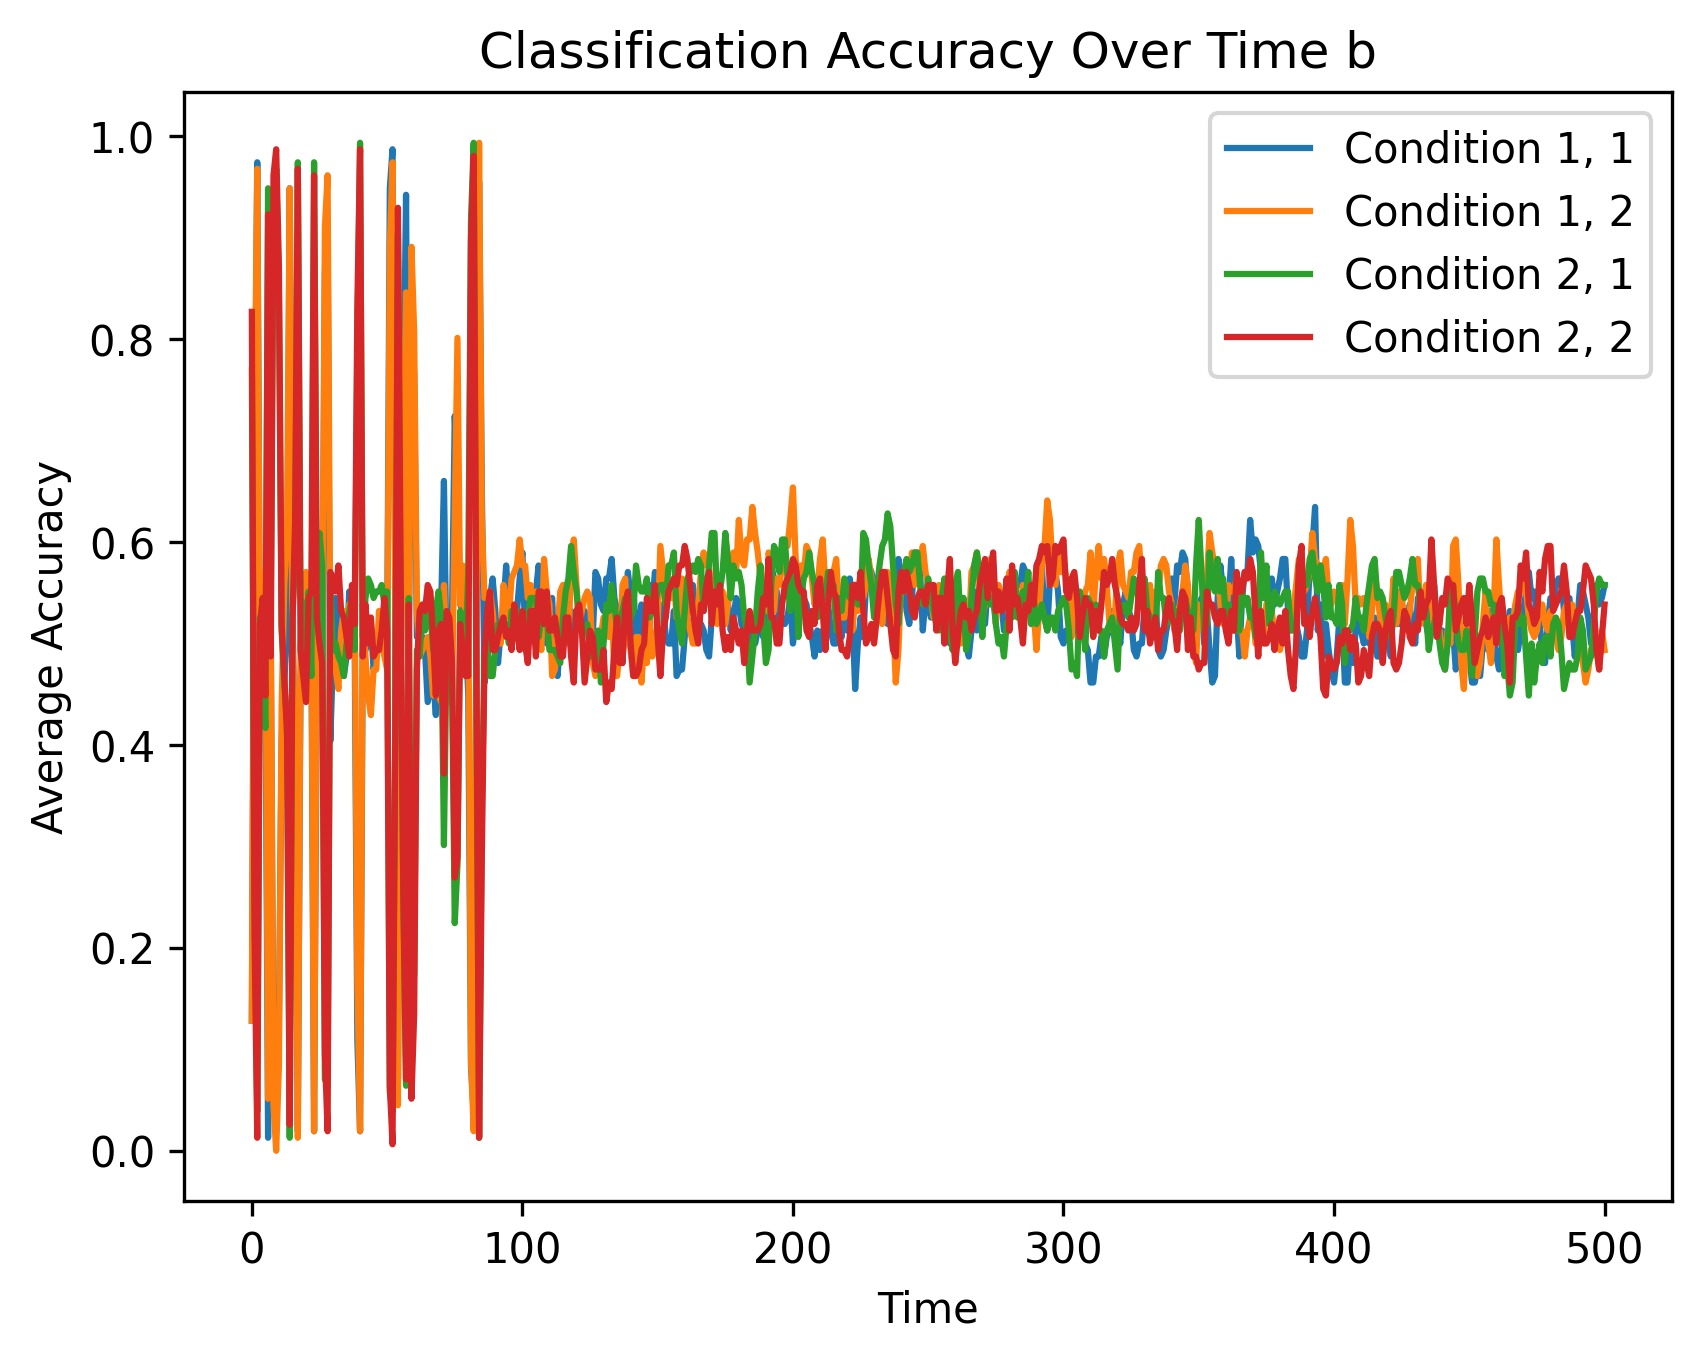

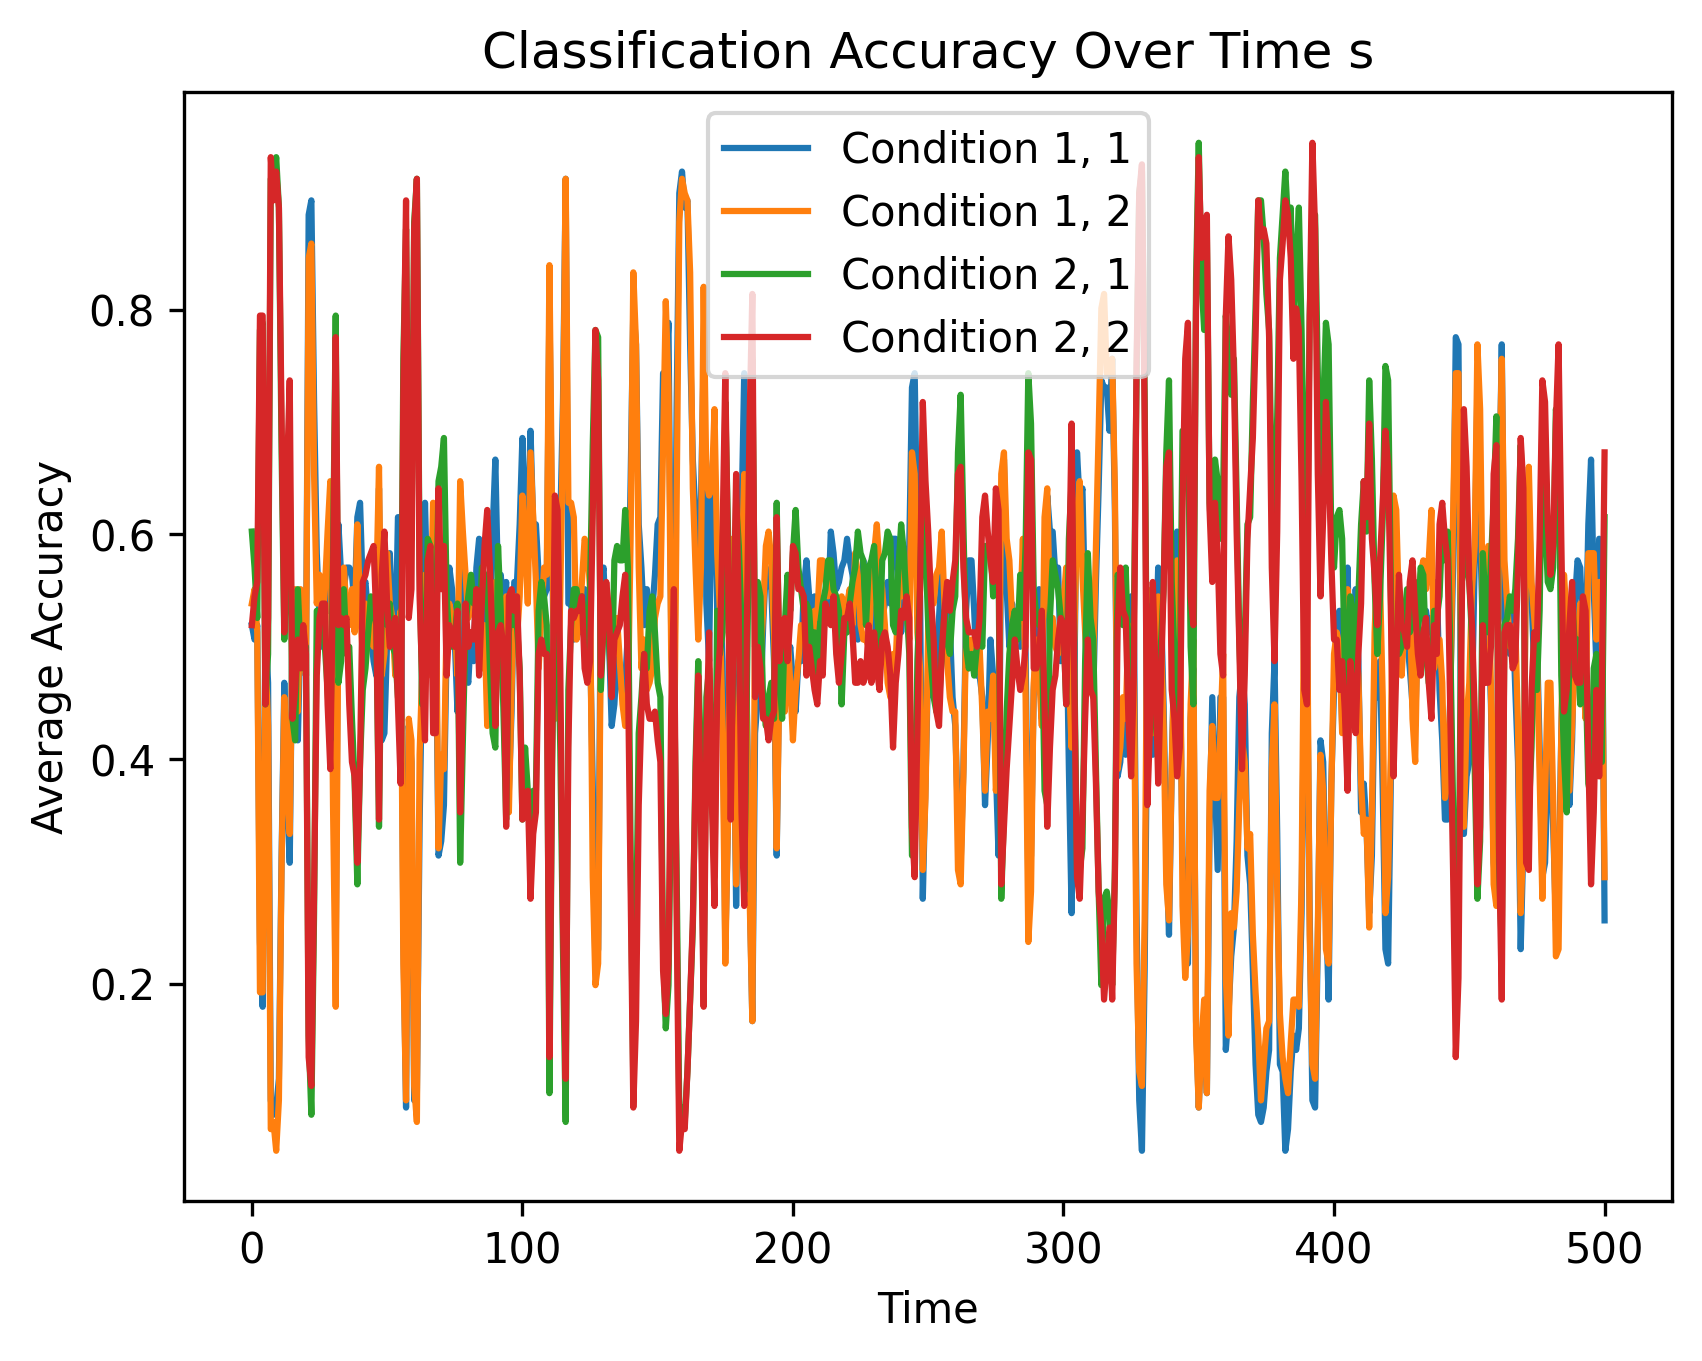

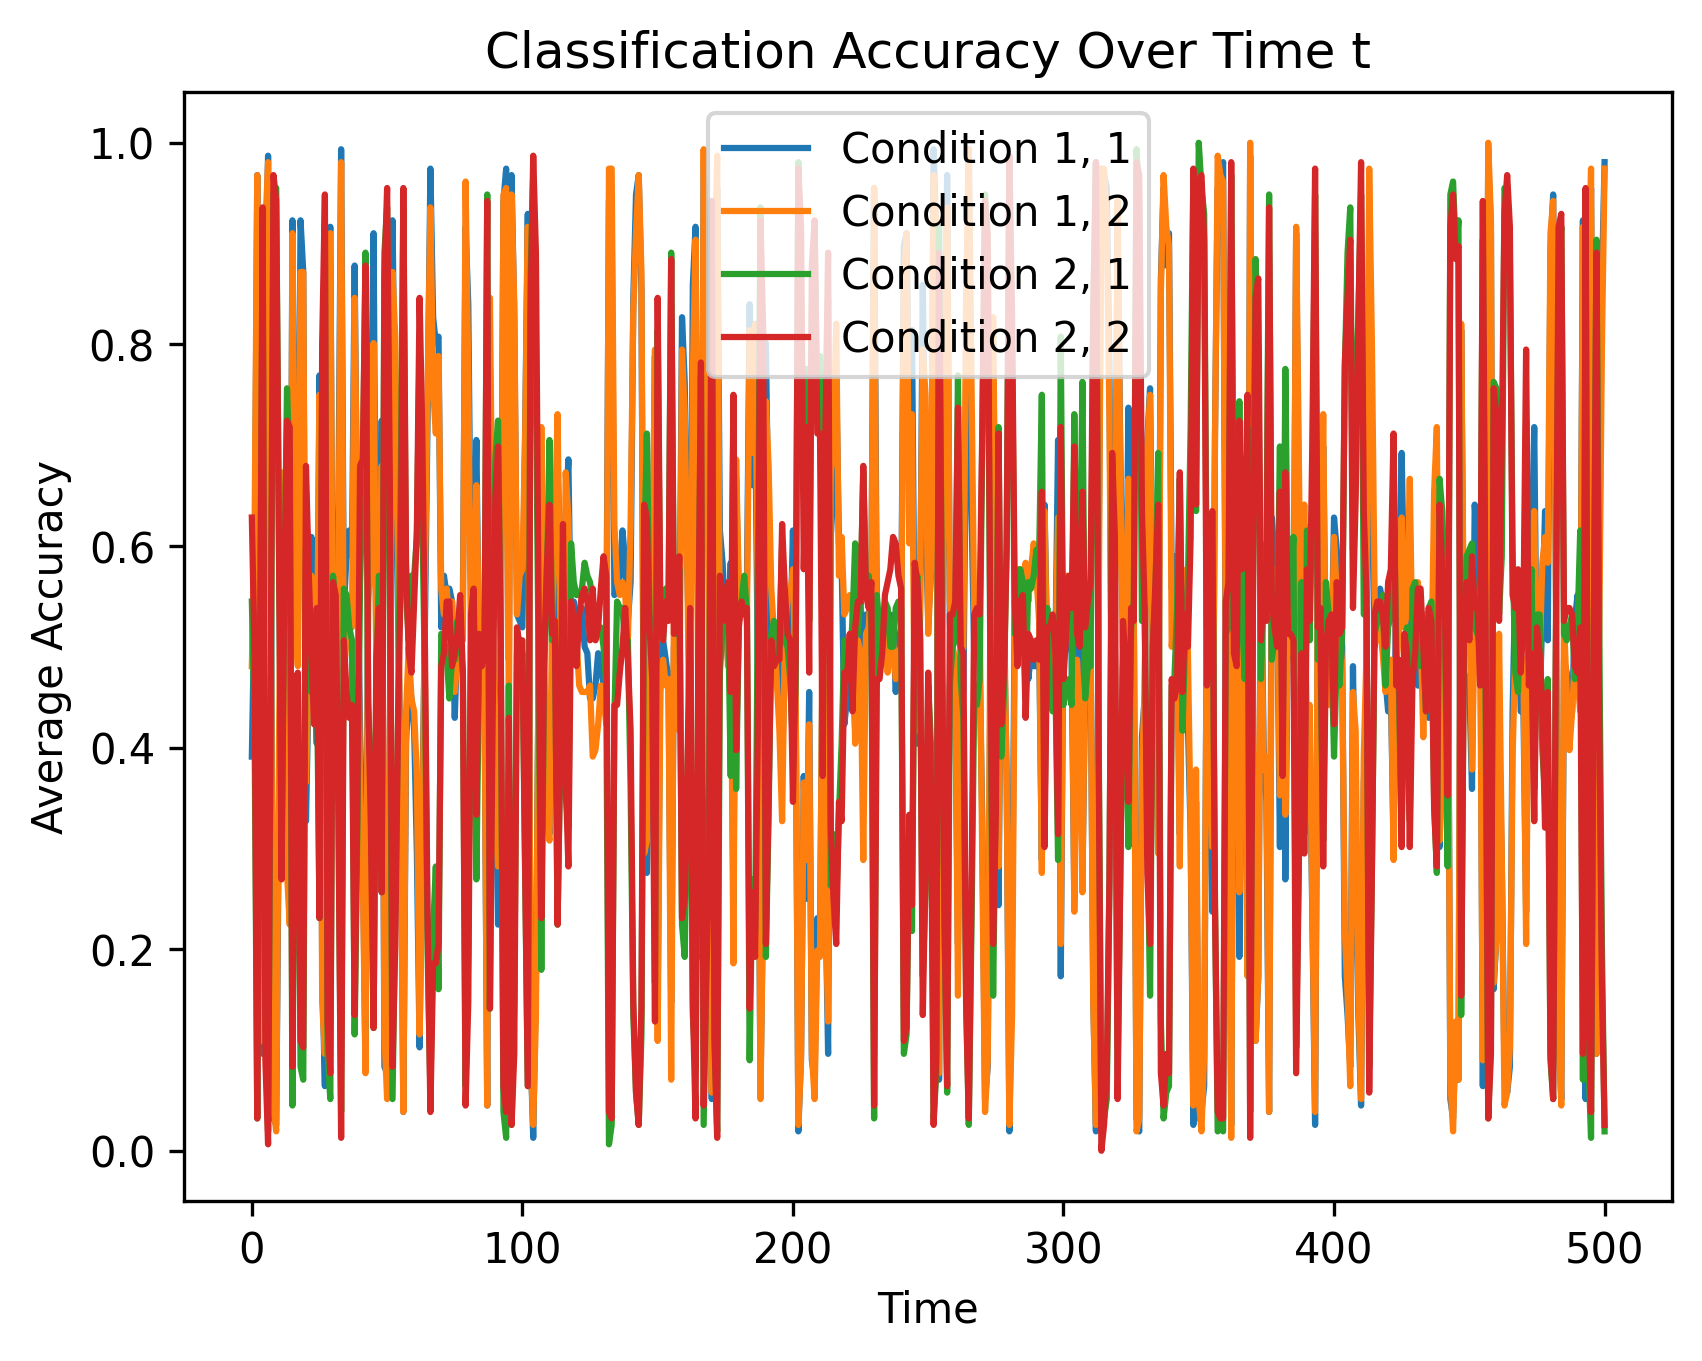

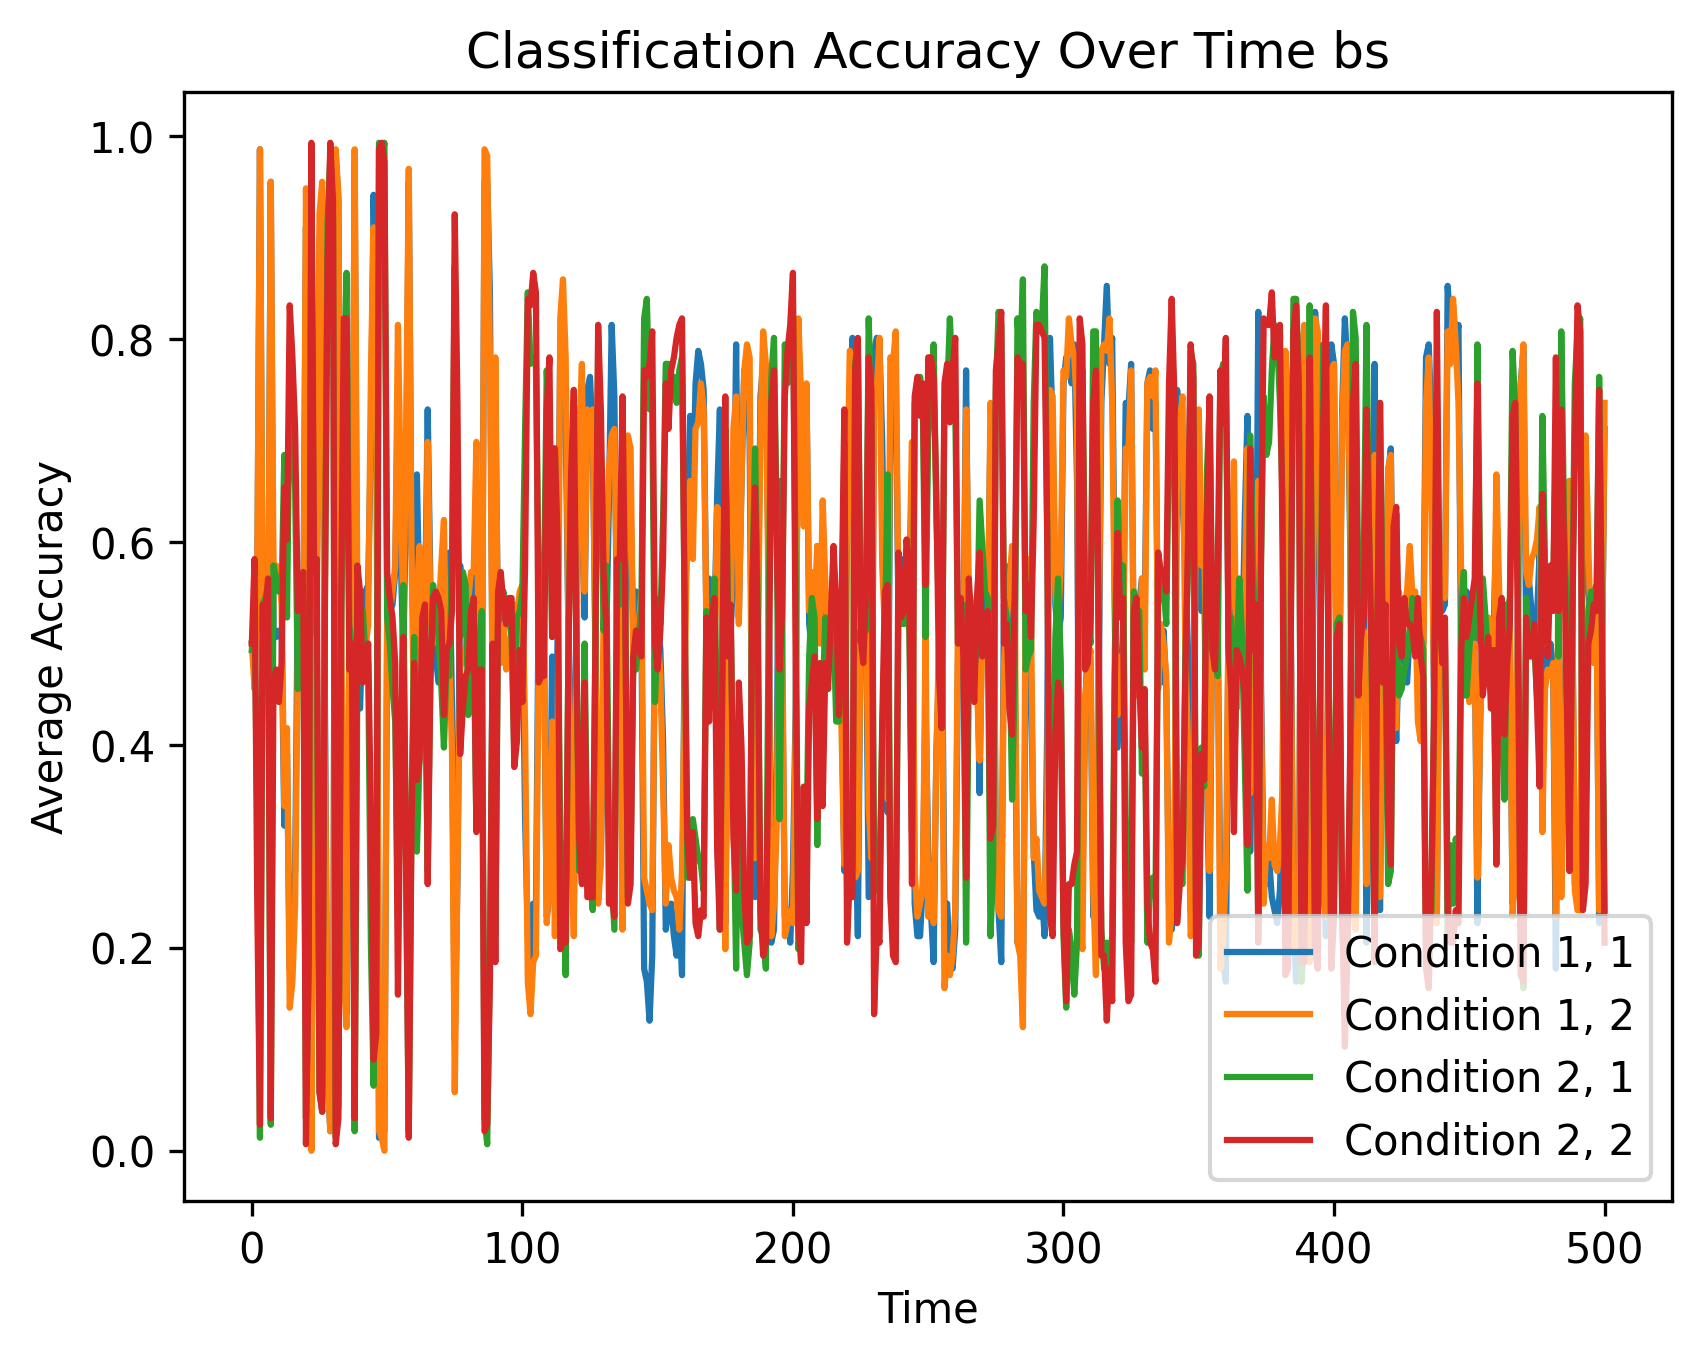

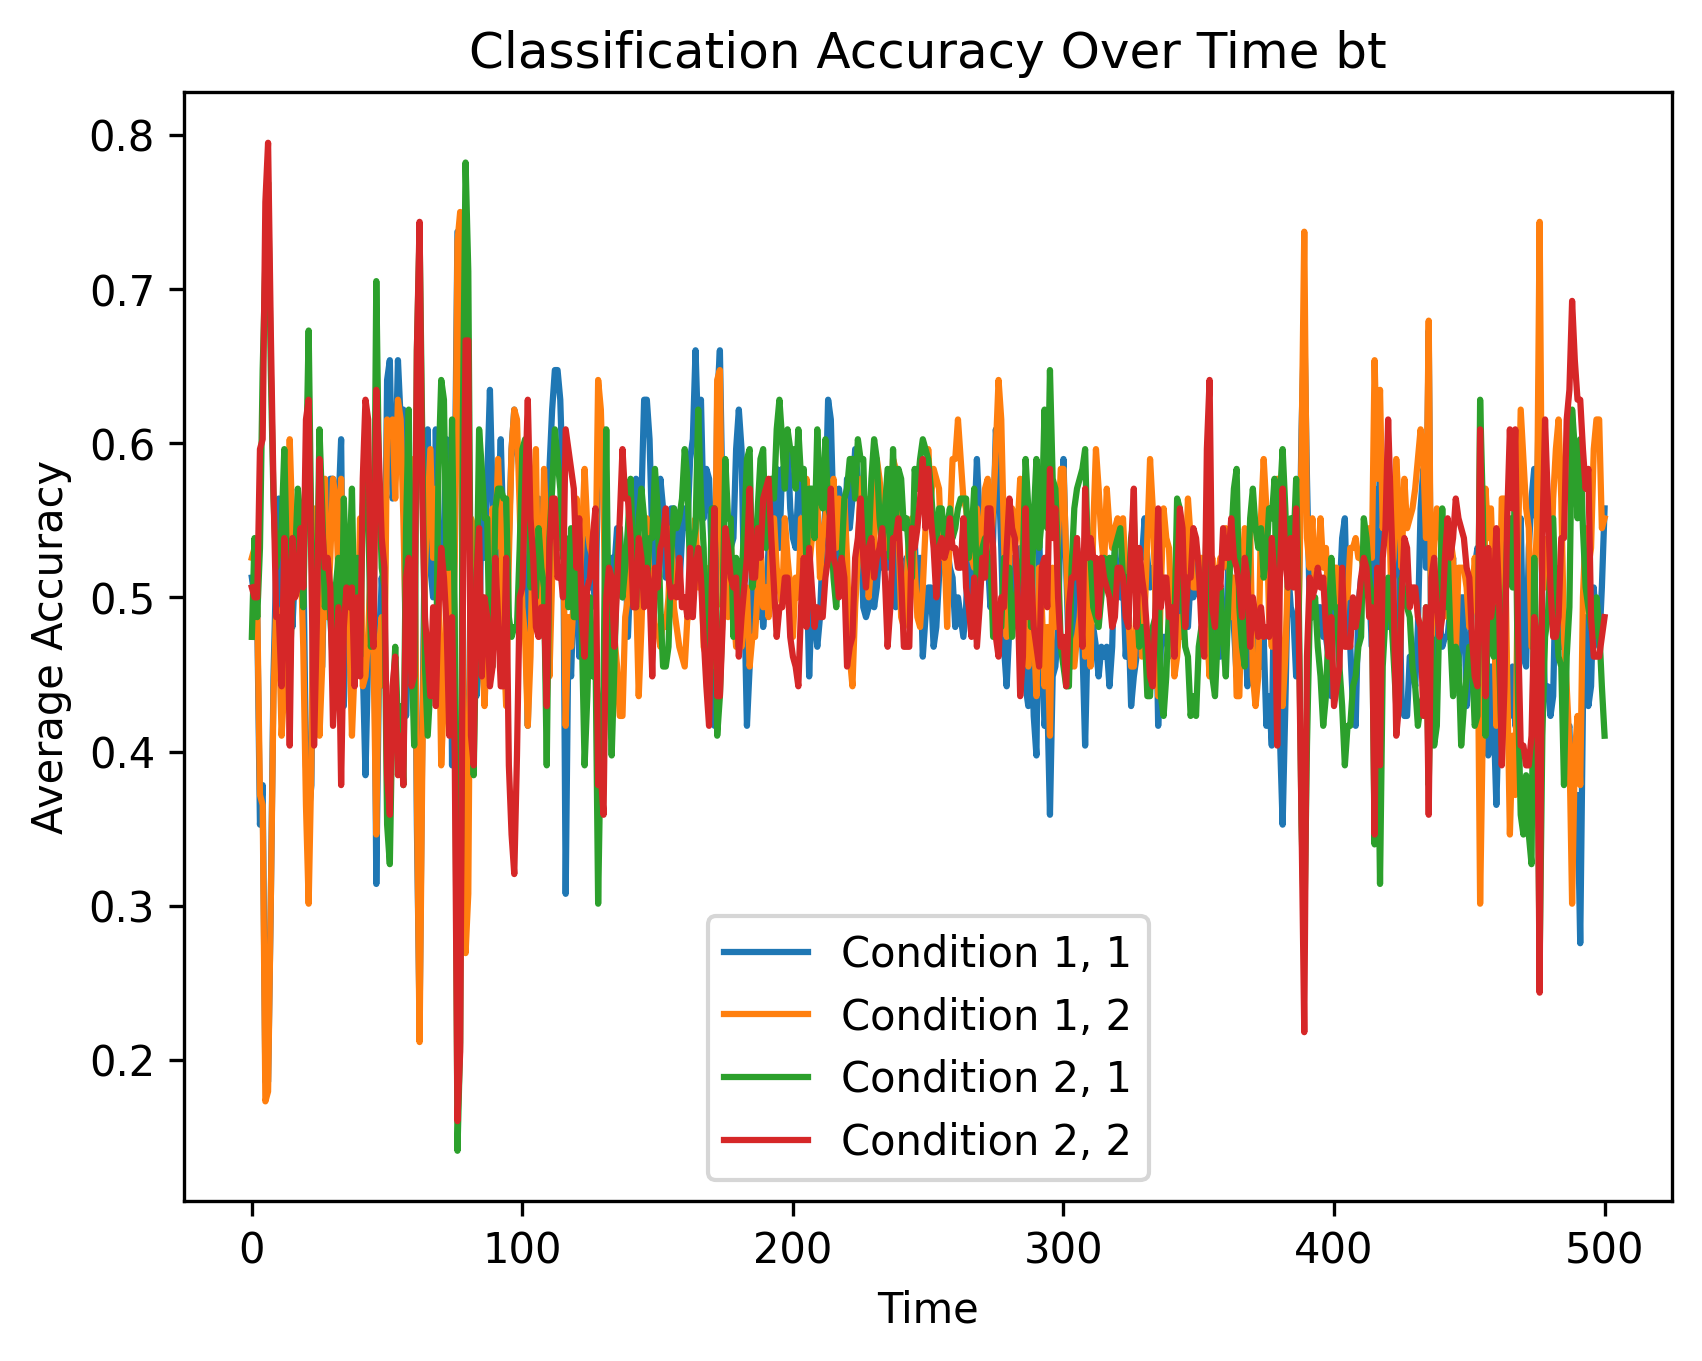

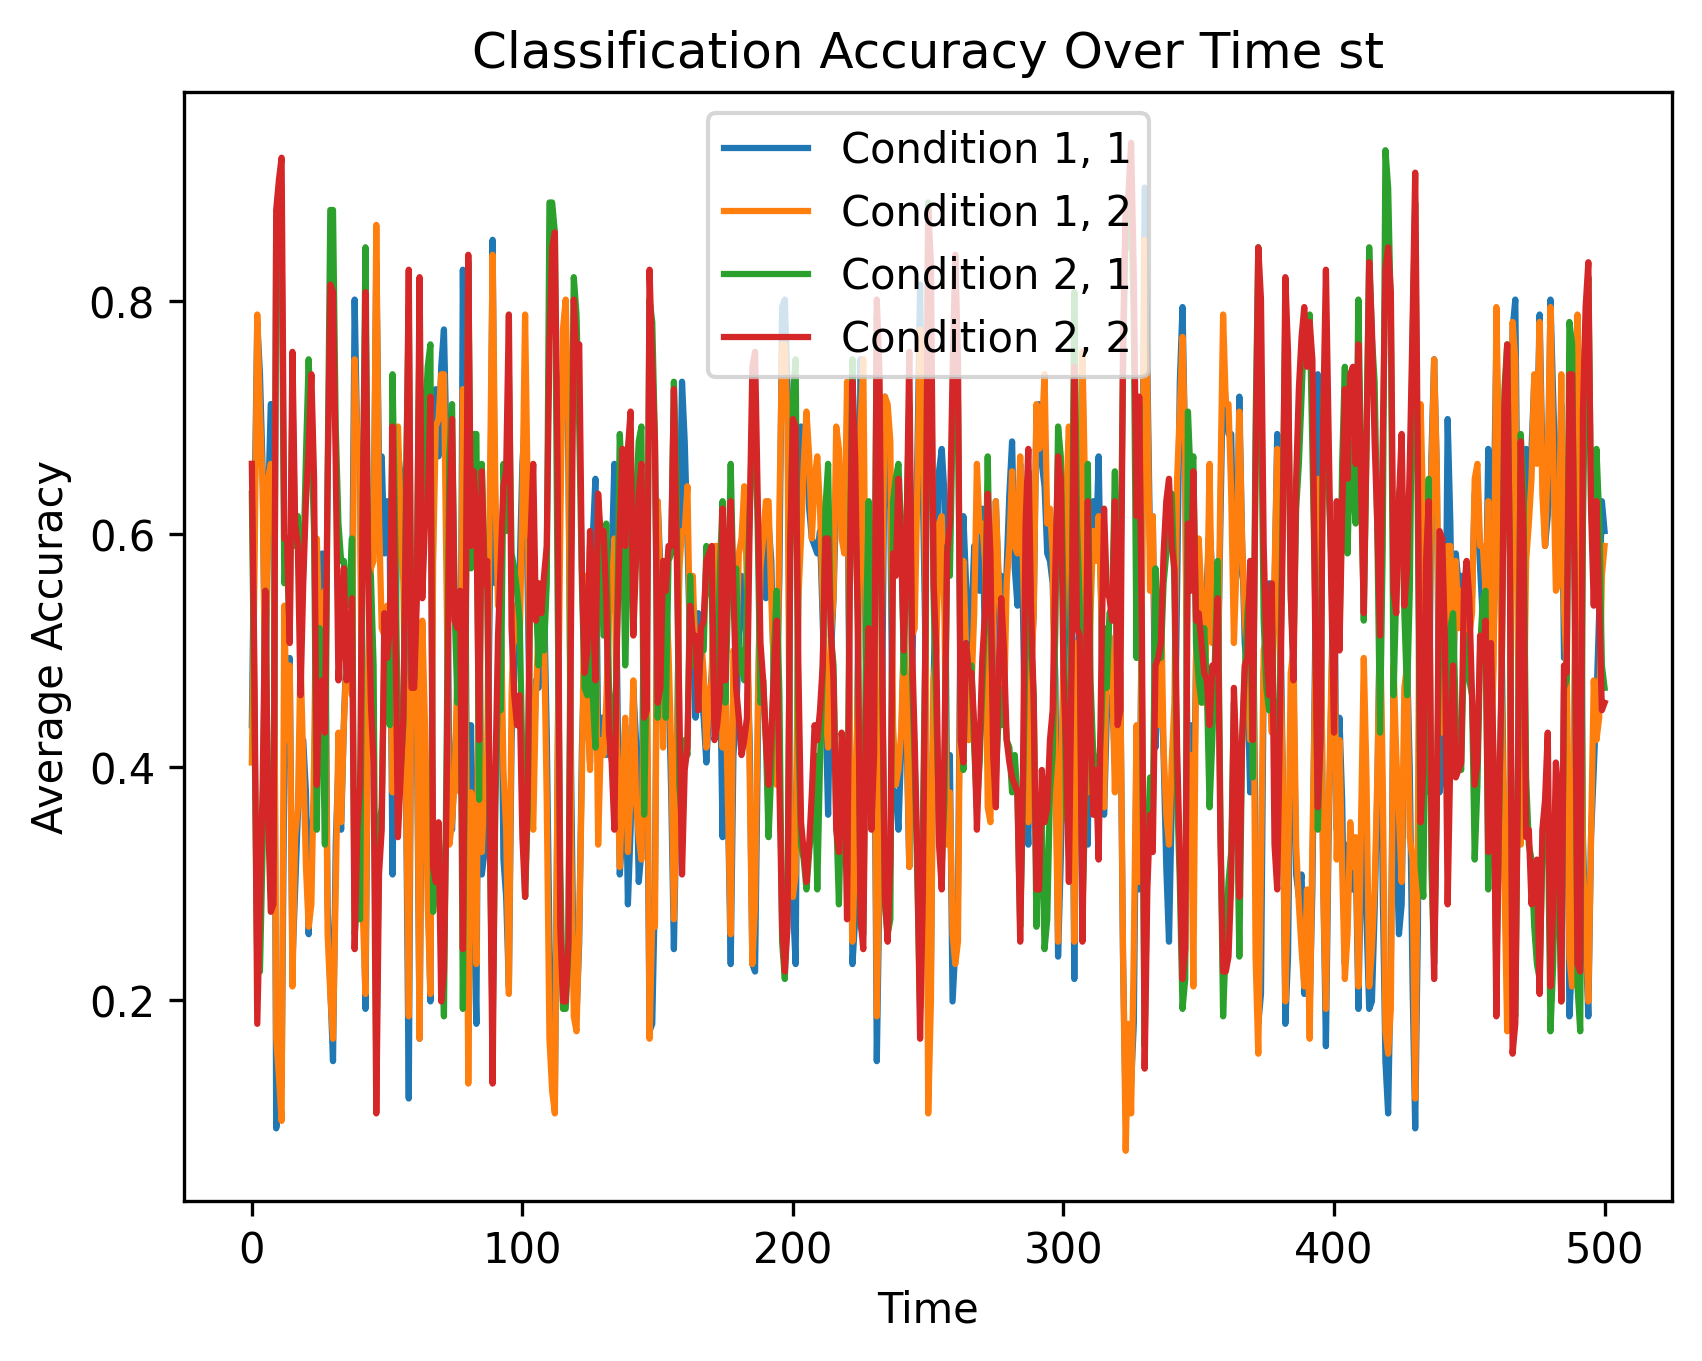

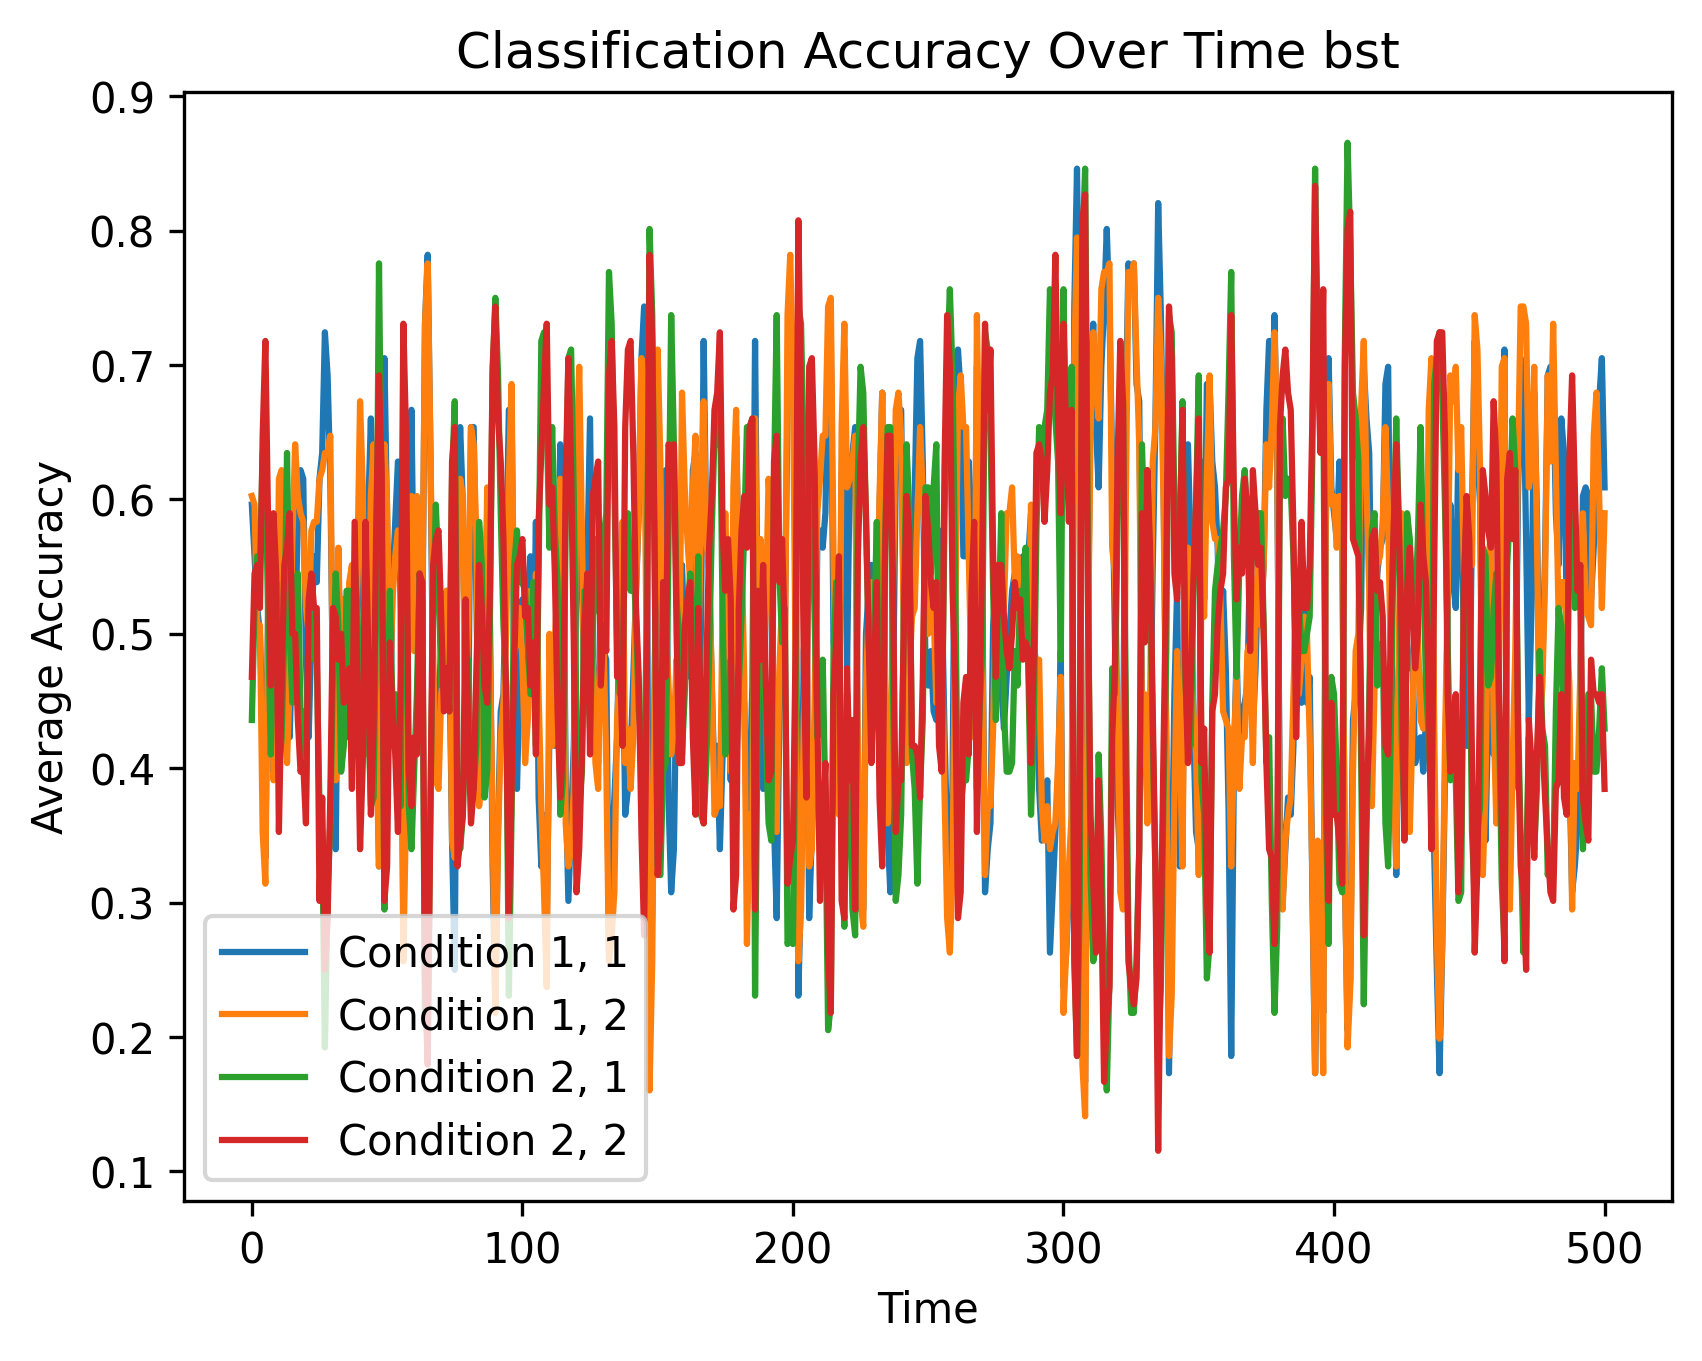

In [51]:
for comp in stat_comps_dic:
    bacc, macc, intacc = classify_trials(cvz,mz, stat_comps=filter_dict([comp],stat_comps_dic))

    accuracy_mean = np.mean(bacc, axis=0)

    fig, ax = plt.subplots(dpi = 300)

    for i in range(2):
        for j in range(2):
            ax.plot(accuracy_mean[i, j, :], label=f'Condition {i+1}, {j+1}')

    ax.set_xlabel('Time')
    ax.set_ylabel('Average Accuracy')
    ax.set_title(f'Classification Accuracy Over Time {comp}')
    ax.legend()

    plt.show()